# Plot trajectories of prevalence and genetic diversity statistics following intervention

In [2]:
import numpy as np
import pandas as pd
import os

from lib.plotting import *
from lib.preferences import *

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.patches as patches
import seaborn as sns

import matplotlib.gridspec as gridspec

# inline stylization
%matplotlib inline
sns.set_style("ticks")
sns.set_style("white")

plt.rcParams["figure.dpi"] = 100
plt.rcParams["savefig.dpi"] = 150
plt.rcParams["xtick.bottom"] = True
plt.rcParams["ytick.left"] = True
plt.rcParams["font.size"] = 12

## Load data from a specific simulation

In [4]:
s = "../results/2020-04-30_bed-intv/sim_bednets_0002/"

In [5]:
op = pd.read_csv(os.path.join(s, "op.csv"))
og = pd.read_csv(os.path.join(s, "og.csv"))
epoch_df = pd.read_csv(os.path.join(s, "epoch_df.csv"))
epoch_df.index = epoch_df.name

## Set plotting preferences

In [6]:
savefig = True

In [7]:
epoch_df

,name,t0,t1,gen_rate,gens,x_h,x_v
name,,,,,,,
init,init,0.000000,53615.384615,265.764957,1.424909e+07,0.653846,0.075556
InitVar,InitVar,53615.384615,57265.384615,265.764957,9.700421e+05,0.653846,0.075556
Crash,Crash,57265.384615,73665.384615,163.446623,2.680525e+06,0.205882,0.016204
CrashVar,CrashVar,73665.384615,77315.384615,163.446623,5.965802e+05,0.205882,0.016204
Recovery,Recovery,77315.384615,130930.769231,265.764957,1.424909e+07,0.653846,0.075556


In [8]:
time_limits = (epoch_df.loc["InitVar", "t0"], epoch_df.loc["CrashVar", "t1"] + 3650) 

In [48]:
genetic_names.update({"mean_k": "C.O.I. ($k$)"})

## Plot prevalence

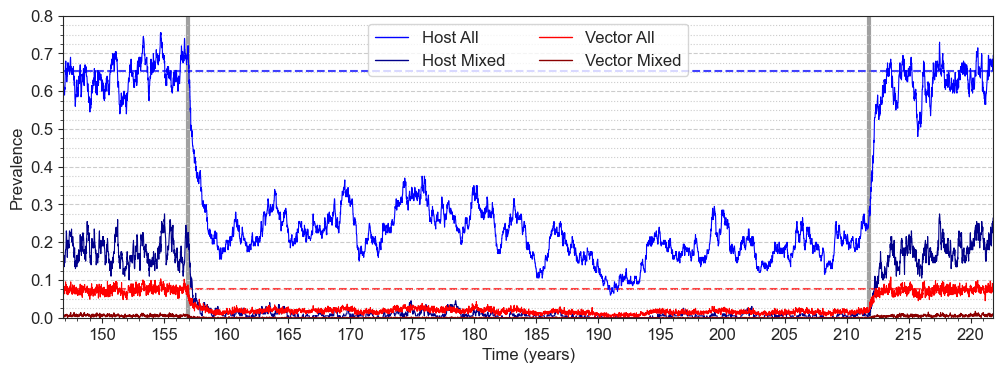

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))


# Host Prevalence
ax.plot(op["t0"], op["HX"], color="blue", linewidth=0.8, label="Host All")
ax.plot(op["t0"], op["HmX"], color="darkblue", linewidth=0.8, label="Host Mixed")

# Vector Prevalence
ax.plot(op["t0"], op["VX"], color="red", linewidth=0.8, label="Vector All")
ax.plot(op["t0"], op["VmX"], color="darkred", linewidth=0.8, label="Vector Mixed")

# Delineate Equilibriums
ax.axhline(epoch_df.loc["init", "x_h"], 
           color="blue", linestyle='dashed', alpha=0.75,
           zorder=-1)
ax.axhline(epoch_df.loc["init", "x_v"], 
           color="red", linestyle='dashed', alpha=0.75,
           zorder=-1)


# Delineate Epochs
ax.axvline(epoch_df.loc["Crash", "t0"], 
           color="grey", alpha=0.75,
           linewidth=3,
           zorder=-1)
ax.axvline(epoch_df.loc["Recovery", "t0"], 
           color="grey", alpha=0.75,
           linewidth=3,
           zorder=-1)

# Limits
ax.set_ylim([0, 0.8])
if time_limits is not None:
    ax.set_xlim(time_limits)
else:
    epoch_t0 = epoch_df.iloc[0].t0
    epoch_t1 = epoch_df.iloc[-1].t1
    time_limits = [epoch_t0, epoch_t1]
    ax.set_xlim(time_limits)
    
# Ticks, y-axis
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.025))
# ax.yaxis.set_minor_formatter(plt.FuncFormatter(lambda val, num: "%.03f" % val if num <= 3 else ""))
ax.tick_params('y', which='minor', labelsize=7)

# Ticks, x-axis
days_per_year = 365
years_per_major_tick = 5
ax.xaxis.set_major_locator(plt.MultipleLocator(days_per_year * years_per_major_tick))
ax.xaxis.set_minor_locator(plt.MultipleLocator(days_per_year))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v, i : int(v / days_per_year)))

# Labels
ax.set_ylabel("Prevalence", fontsize=12)
ax.set_xlabel("Time (years)", fontsize=12)

# Grid
ax.grid(axis="y", linestyle="dashed", zorder=-2)
ax.grid(axis="y", which="minor", linestyle="dotted", zorder=-2)

# Legend
leg = ax.legend(loc="upper center", ncol=2, fontsize=12)
for l in leg.legendHandles:
    l.set_linewidth(1.0)
    
if savefig:
    fig.savefig("../figs/sec3_trajectory-prevalence.svg", 
                bbox_inches="tight", pad_inches=0.5)

## Genetic diversity statistics

In [10]:
metrics = ["pi", "mean_k", "avg_l_ibd", "tajd"]
metric_cols = sns.color_palette("Set1", len(metrics))
m_dt = dict(zip(metrics, metric_cols))

### Complexity of Infection ($K$)

In [11]:
metric = "mean_k"

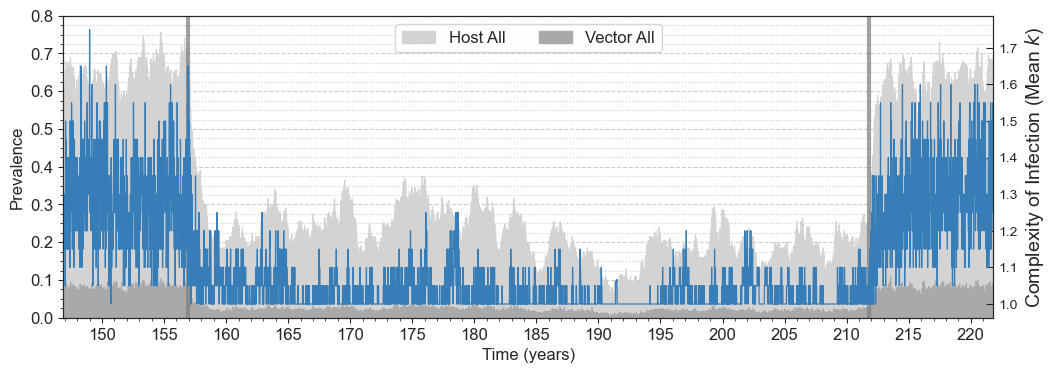

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))


# Host Prevalence
ax.fill_between(x=op["t0"], y1=0, y2=op["HX"], color="lightgrey", linewidth=0.8, label="Host All")

# Vector Prevalence
ax.fill_between(x=op["t0"], y1=0, y2=op["VX"], color="darkgrey", linewidth=0.8, label="Vector All")

# Delineate Epochs
ax.axvline(epoch_df.loc["Crash", "t0"], 
           color="grey", alpha=0.75,
           linewidth=3,
           zorder=2)
ax.axvline(epoch_df.loc["Recovery", "t0"], 
           color="grey", alpha=0.75,
           linewidth=3,
           zorder=2)

# Limits
ax.set_ylim([0, 0.8])
if time_limits is not None:
    ax.set_xlim(time_limits)
else:
    epoch_t0 = epoch_df.iloc[0].t0
    epoch_t1 = epoch_df.iloc[-1].t1
    time_limits = [epoch_t0, epoch_t1]
    ax.set_xlim(time_limits)
    
# Ticks, y-axis
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.025))
ax.tick_params('y', which='minor', labelsize=7)

# Ticks, x-axis
days_per_year = 365
years_per_major_tick = 5
ax.xaxis.set_major_locator(plt.MultipleLocator(days_per_year * years_per_major_tick))
ax.xaxis.set_minor_locator(plt.MultipleLocator(days_per_year))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v, i : int(v / days_per_year)))

# Labels
ax.set_ylabel("Prevalence", fontsize=12)
ax.set_xlabel("Time (years)", fontsize=12)

# Grid
ax.grid(axis="y", linestyle="dashed", zorder=-2)
ax.grid(axis="y", which="minor", linestyle="dotted", zorder=-2)

# Legend
leg = ax.legend(loc="upper center", ncol=2, fontsize=12)
for l in leg.legendHandles:
    l.set_linewidth(1.0)

# Twin axis
axm = ax.twinx()

# Plot
axm.plot(og["t0"], og[metric], color=m_dt[metric], linewidth=0.9)
axm.set_ylabel(genetic_names[metric], fontsize=14)
axm.tick_params(axis='y', which='major', direction='in', length=5, labelsize=10)
axm.set_xlim(time_limits)
    
if savefig:
    fig.savefig("../figs/sec3_trajectory-%s.png" % metric, 
                bbox_inches="tight", pad_inches=0.5)

### Nucleotide diversity ($\pi$)

In [12]:
metric = "pi"

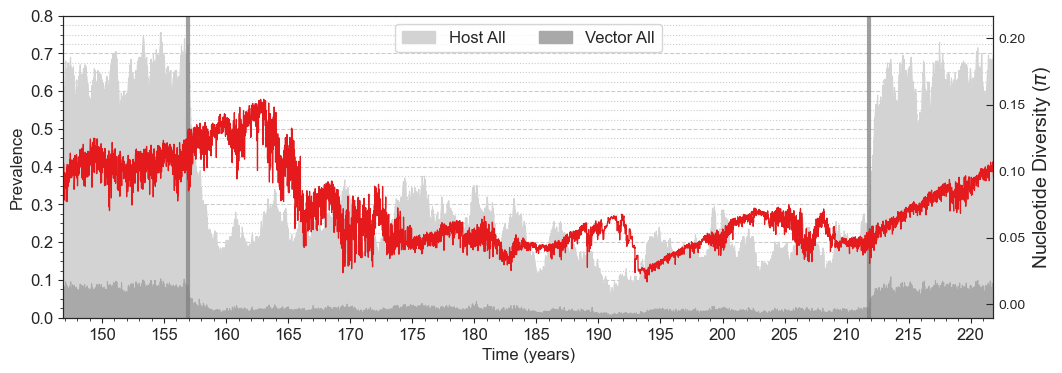

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

# Host Prevalence
ax.fill_between(x=op["t0"], y1=0, y2=op["HX"], color="lightgrey", linewidth=0.8, label="Host All")

# Vector Prevalence
ax.fill_between(x=op["t0"], y1=0, y2=op["VX"], color="darkgrey", linewidth=0.8, label="Vector All")

# Delineate Epochs
ax.axvline(epoch_df.loc["Crash", "t0"], 
           color="grey", alpha=0.75,
           linewidth=3,
           zorder=2)
ax.axvline(epoch_df.loc["Recovery", "t0"], 
           color="grey", alpha=0.75,
           linewidth=3,
           zorder=2)

# Limits
ax.set_ylim([0, 0.8])
if time_limits is not None:
    ax.set_xlim(time_limits)
else:
    epoch_t0 = epoch_df.iloc[0].t0
    epoch_t1 = epoch_df.iloc[-1].t1
    time_limits = [epoch_t0, epoch_t1]
    ax.set_xlim(time_limits)
    
# Ticks, y-axis
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.025))
ax.tick_params('y', which='minor', labelsize=7)

# Ticks, x-axis
days_per_year = 365
years_per_major_tick = 5
ax.xaxis.set_major_locator(plt.MultipleLocator(days_per_year * years_per_major_tick))
ax.xaxis.set_minor_locator(plt.MultipleLocator(days_per_year))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v, i : int(v / days_per_year)))

# Labels
ax.set_ylabel("Prevalence", fontsize=12)
ax.set_xlabel("Time (years)", fontsize=12)

# Grid
ax.grid(axis="y", linestyle="dashed", zorder=-2)
ax.grid(axis="y", which="minor", linestyle="dotted", zorder=-2)

# Legend
leg = ax.legend(loc="upper center", ncol=2, fontsize=12)
for l in leg.legendHandles:
    l.set_linewidth(1.0)

# Twin axis
axm = ax.twinx()

# Plot
axm.plot(og["t0"], og[metric], color=m_dt[metric], linewidth=0.9)
axm.set_ylabel(genetic_names[metric], fontsize=14)
axm.tick_params(axis='y', which='major', direction='in', length=5, labelsize=10)
axm.set_xlim(time_limits)
    
if savefig:
    fig.savefig("../figs/sec3_trajectory-%s.svg" % metric, 
                bbox_inches="tight", pad_inches=0.5)

### Average IBD tract length

In [14]:
metric = "avg_l_ibd"

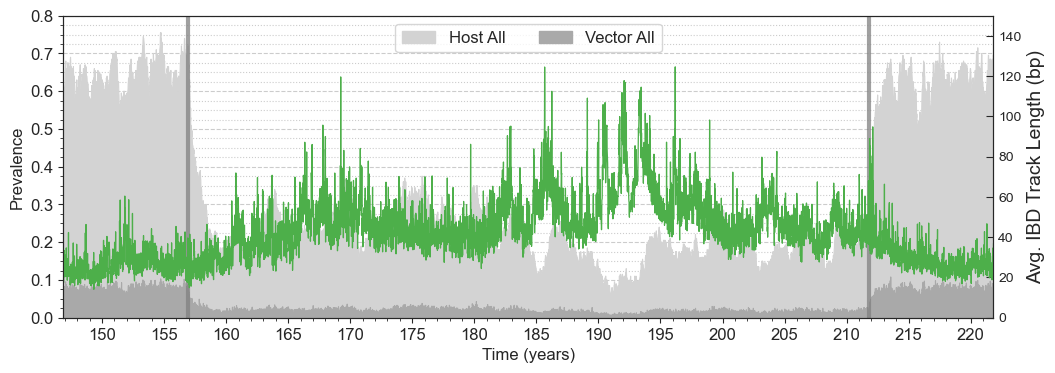

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

# Host Prevalence
ax.fill_between(x=op["t0"], y1=0, y2=op["HX"], color="lightgrey", linewidth=0.8, label="Host All")

# Vector Prevalence
ax.fill_between(x=op["t0"], y1=0, y2=op["VX"], color="darkgrey", linewidth=0.8, label="Vector All")

# Delineate Epochs
ax.axvline(epoch_df.loc["Crash", "t0"], 
           color="grey", alpha=0.75,
           linewidth=3,
           zorder=2)
ax.axvline(epoch_df.loc["Recovery", "t0"], 
           color="grey", alpha=0.75,
           linewidth=3,
           zorder=2)

# Limits
ax.set_ylim([0, 0.8])
if time_limits is not None:
    ax.set_xlim(time_limits)
else:
    epoch_t0 = epoch_df.iloc[0].t0
    epoch_t1 = epoch_df.iloc[-1].t1
    time_limits = [epoch_t0, epoch_t1]
    ax.set_xlim(time_limits)
    
# Ticks, y-axis
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.025))
ax.tick_params('y', which='minor', labelsize=7)

# Ticks, x-axis
days_per_year = 365
years_per_major_tick = 5
ax.xaxis.set_major_locator(plt.MultipleLocator(days_per_year * years_per_major_tick))
ax.xaxis.set_minor_locator(plt.MultipleLocator(days_per_year))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v, i : int(v / days_per_year)))

# Labels
ax.set_ylabel("Prevalence", fontsize=12)
ax.set_xlabel("Time (years)", fontsize=12)

# Grid
ax.grid(axis="y", linestyle="dashed", zorder=-2)
ax.grid(axis="y", which="minor", linestyle="dotted", zorder=-2)

# Legend
leg = ax.legend(loc="upper center", ncol=2, fontsize=12)
for l in leg.legendHandles:
    l.set_linewidth(1.0)

# Twin axis
axm = ax.twinx()

# Plot
axm.plot(og["t0"], og[metric], color=m_dt[metric], linewidth=0.9)
axm.set_ylabel(genetic_names[metric], fontsize=14)
axm.tick_params(axis='y', which='major', direction='in', length=5, labelsize=10)
axm.set_xlim(time_limits)
axm.set_ylim((0, 150))
    
if savefig:
    fig.savefig("../figs/sec3_trajectory-%s.svg" % metric, 
                bbox_inches="tight", pad_inches=0.5)

### Average IBD tract length

In [16]:
metric = "tajd"

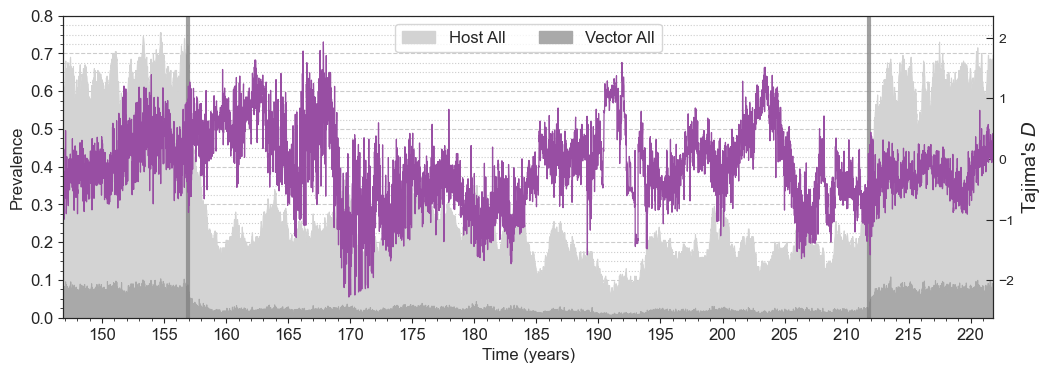

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

# Host Prevalence
ax.fill_between(x=op["t0"], y1=0, y2=op["HX"], color="lightgrey", linewidth=0.8, label="Host All")

# Vector Prevalence
ax.fill_between(x=op["t0"], y1=0, y2=op["VX"], color="darkgrey", linewidth=0.8, label="Vector All")

# Delineate Epochs
ax.axvline(epoch_df.loc["Crash", "t0"], 
           color="grey", alpha=0.75,
           linewidth=3,
           zorder=2)
ax.axvline(epoch_df.loc["Recovery", "t0"], 
           color="grey", alpha=0.75,
           linewidth=3,
           zorder=2)

# Limits
ax.set_ylim([0, 0.8])
if time_limits is not None:
    ax.set_xlim(time_limits)
else:
    epoch_t0 = epoch_df.iloc[0].t0
    epoch_t1 = epoch_df.iloc[-1].t1
    time_limits = [epoch_t0, epoch_t1]
    ax.set_xlim(time_limits)
    
# Ticks, y-axis
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.025))
ax.tick_params('y', which='minor', labelsize=7)

# Ticks, x-axis
days_per_year = 365
years_per_major_tick = 5
ax.xaxis.set_major_locator(plt.MultipleLocator(days_per_year * years_per_major_tick))
ax.xaxis.set_minor_locator(plt.MultipleLocator(days_per_year))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v, i : int(v / days_per_year)))

# Labels
ax.set_ylabel("Prevalence", fontsize=12)
ax.set_xlabel("Time (years)", fontsize=12)

# Grid
ax.grid(axis="y", linestyle="dashed", zorder=-2)
ax.grid(axis="y", which="minor", linestyle="dotted", zorder=-2)

# Legend
leg = ax.legend(loc="upper center", ncol=2, fontsize=12)
for l in leg.legendHandles:
    l.set_linewidth(1.0)

# Twin axis
axm = ax.twinx()

# Plot
axm.plot(og["t0"], og[metric], color=m_dt[metric], linewidth=0.9)
axm.set_ylabel(genetic_names[metric], fontsize=14)
axm.tick_params(axis='y', which='major', direction='in', length=5, labelsize=10)
axm.set_xlim(time_limits)
    
if savefig:
    fig.savefig("../figs/sec3_trajectory-%s.svg" % metric, 
                bbox_inches="tight", pad_inches=0.5)

### Average IBD tract length

In [18]:
metric = "theta"
m_dt.update({metric: "darkorange"})

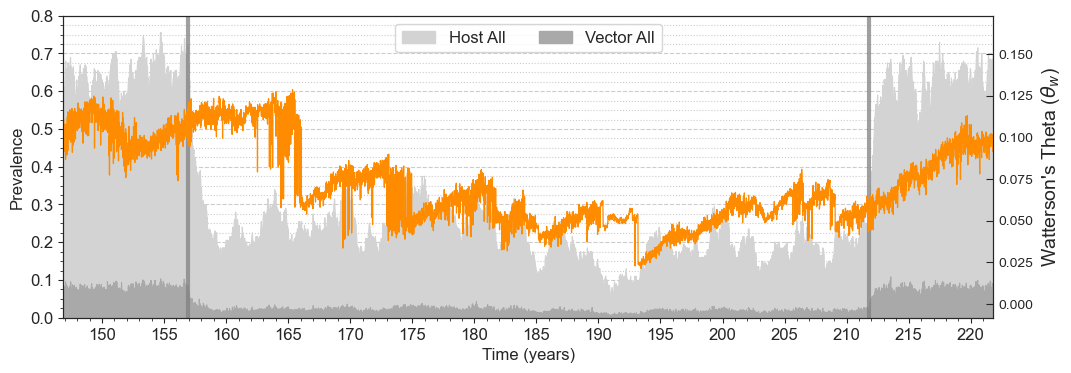

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

# Host Prevalence
ax.fill_between(x=op["t0"], y1=0, y2=op["HX"], color="lightgrey", linewidth=0.8, label="Host All")

# Vector Prevalence
ax.fill_between(x=op["t0"], y1=0, y2=op["VX"], color="darkgrey", linewidth=0.8, label="Vector All")

# Delineate Epochs
ax.axvline(epoch_df.loc["Crash", "t0"], 
           color="grey", alpha=0.75,
           linewidth=3,
           zorder=2)
ax.axvline(epoch_df.loc["Recovery", "t0"], 
           color="grey", alpha=0.75,
           linewidth=3,
           zorder=2)

# Limits
ax.set_ylim([0, 0.8])
if time_limits is not None:
    ax.set_xlim(time_limits)
else:
    epoch_t0 = epoch_df.iloc[0].t0
    epoch_t1 = epoch_df.iloc[-1].t1
    time_limits = [epoch_t0, epoch_t1]
    ax.set_xlim(time_limits)
    
# Ticks, y-axis
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.025))
ax.tick_params('y', which='minor', labelsize=7)

# Ticks, x-axis
days_per_year = 365
years_per_major_tick = 5
ax.xaxis.set_major_locator(plt.MultipleLocator(days_per_year * years_per_major_tick))
ax.xaxis.set_minor_locator(plt.MultipleLocator(days_per_year))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v, i : int(v / days_per_year)))

# Labels
ax.set_ylabel("Prevalence", fontsize=12)
ax.set_xlabel("Time (years)", fontsize=12)

# Grid
ax.grid(axis="y", linestyle="dashed", zorder=-2)
ax.grid(axis="y", which="minor", linestyle="dotted", zorder=-2)

# Legend
leg = ax.legend(loc="upper center", ncol=2, fontsize=12)
for l in leg.legendHandles:
    l.set_linewidth(1.0)

# Twin axis
axm = ax.twinx()

# Plot
axm.plot(og["t0"], og[metric], color=m_dt[metric], linewidth=0.9)
axm.set_ylabel(genetic_names[metric], fontsize=14)
axm.tick_params(axis='y', which='major', direction='in', length=5, labelsize=10)
axm.set_xlim(time_limits)
    
if savefig:
    fig.savefig("../figs/sec3_trajectory-%s.svg" % metric, 
                bbox_inches="tight", pad_inches=0.5)

## Multiple plots

The axes are very similar, so let's make a multi-panel plot.

### Using functions

In [16]:
def prevalence_plot(op, epoch_df, time_limits, ax):
    """
    Plot prevalence trajectory
    """
    
    # Host Prevalence
    ax.plot(op["t0"], op["HX"], color="blue", linewidth=0.8, label="Host All")
    ax.plot(op["t0"], op["HmX"], color="darkblue", linewidth=0.8, label="Host Mixed")

    # Vector Prevalence
    ax.plot(op["t0"], op["VX"], color="red", linewidth=0.8, label="Vector All")
    ax.plot(op["t0"], op["VmX"], color="darkred", linewidth=0.8, label="Vector Mixed")

    # Delineate Equilibriums
    ax.axhline(epoch_df.loc["init", "x_h"], 
               color="blue", linestyle='dashed', alpha=0.75,
               zorder=-1)
    ax.axhline(epoch_df.loc["init", "x_v"], 
               color="red", linestyle='dashed', alpha=0.75,
               zorder=-1)


    # Delineate Epochs
    ax.axvline(epoch_df.loc["Crash", "t0"], 
               color="grey", alpha=0.75,
               linewidth=3,
               zorder=-1)
    ax.axvline(epoch_df.loc["Recovery", "t0"], 
               color="grey", alpha=0.75,
               linewidth=3,
               zorder=-1)

    # Limits
    ax.set_ylim([0, 0.8])
    if time_limits is not None:
        ax.set_xlim(time_limits)
    else:
        epoch_t0 = epoch_df.iloc[0].t0
        epoch_t1 = epoch_df.iloc[-1].t1
        time_limits = [epoch_t0, epoch_t1]
        ax.set_xlim(time_limits)

    # Ticks, y-axis
    ax.yaxis.set_minor_locator(plt.MultipleLocator(0.025))
    # ax.yaxis.set_minor_formatter(plt.FuncFormatter(lambda val, num: "%.03f" % val if num <= 3 else ""))
    ax.tick_params('y', which='minor', labelsize=7)

    # Ticks, x-axis
    days_per_year = 365
    years_per_major_tick = 5
    ax.xaxis.set_major_locator(plt.MultipleLocator(days_per_year * years_per_major_tick))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(days_per_year))
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v, i : int(v / days_per_year)))

    # Labels
    ax.set_ylabel("Prevalence", fontsize=12)
    ax.set_xlabel("Time (years)", fontsize=12)

    # Grid
    ax.grid(axis="y", linestyle="dashed", zorder=-2)
    ax.grid(axis="y", which="minor", linestyle="dotted", zorder=-2)

    # Legend
    leg = ax.legend(loc="upper center", ncol=2, fontsize=12)
    for l in leg.legendHandles:
        l.set_linewidth(1.0)

In [17]:
def genetic_plot(op, og, metric, epoch_df, time_limits, m_dt, ax):
    """
    Genetic diversity statistic trajectory
    """
    # Host Prevalence
    ax.fill_between(x=op["t0"], y1=0, y2=op["HX"], color="lightgrey", linewidth=0.8, label="Host All")

    # Vector Prevalence
    ax.fill_between(x=op["t0"], y1=0, y2=op["VX"], color="darkgrey", linewidth=0.8, label="Vector All")

    # Delineate Epochs
    ax.axvline(epoch_df.loc["Crash", "t0"], 
               color="grey", alpha=0.75,
               linewidth=3,
               zorder=2)
    ax.axvline(epoch_df.loc["Recovery", "t0"], 
               color="grey", alpha=0.75,
               linewidth=3,
               zorder=2)

    # Limits
    ax.set_ylim([0, 0.8])
    if time_limits is not None:
        ax.set_xlim(time_limits)
    else:
        epoch_t0 = epoch_df.iloc[0].t0
        epoch_t1 = epoch_df.iloc[-1].t1
        time_limits = [epoch_t0, epoch_t1]
        ax.set_xlim(time_limits)

    # Ticks, y-axis
    ax.yaxis.set_minor_locator(plt.MultipleLocator(0.025))
    ax.tick_params('y', which='minor', labelsize=7)

    # Ticks, x-axis
    days_per_year = 365
    years_per_major_tick = 5
    ax.xaxis.set_major_locator(plt.MultipleLocator(days_per_year * years_per_major_tick))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(days_per_year))
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v, i : int(v / days_per_year)))

    # Labels
    ax.set_ylabel("Prevalence", fontsize=12)
    ax.set_xlabel("Time (years)", fontsize=12)

    # Grid
    ax.grid(axis="y", linestyle="dashed", zorder=-2)
    ax.grid(axis="y", which="minor", linestyle="dotted", zorder=-2)

    # Legend
    leg = ax.legend(loc="upper center", ncol=2, fontsize=12)
    for l in leg.legendHandles:
        l.set_linewidth(1.0)

    # Twin axis
    axm = ax.twinx()

    # Plot
    axm.plot(og["t0"], og[metric], color=m_dt[metric], linewidth=0.9)
    axm.set_ylabel(genetic_names[metric], fontsize=14)
    axm.tick_params(axis='y', which='major', direction='in', length=5, labelsize=10)
    axm.set_xlim(time_limits)

In [10]:
metrics = ["pi", "mean_k", "avg_l_ibd", "tajd"]
metric_cols = sns.color_palette("Set1", len(metrics))
m_dt = dict(zip(metrics, metric_cols))

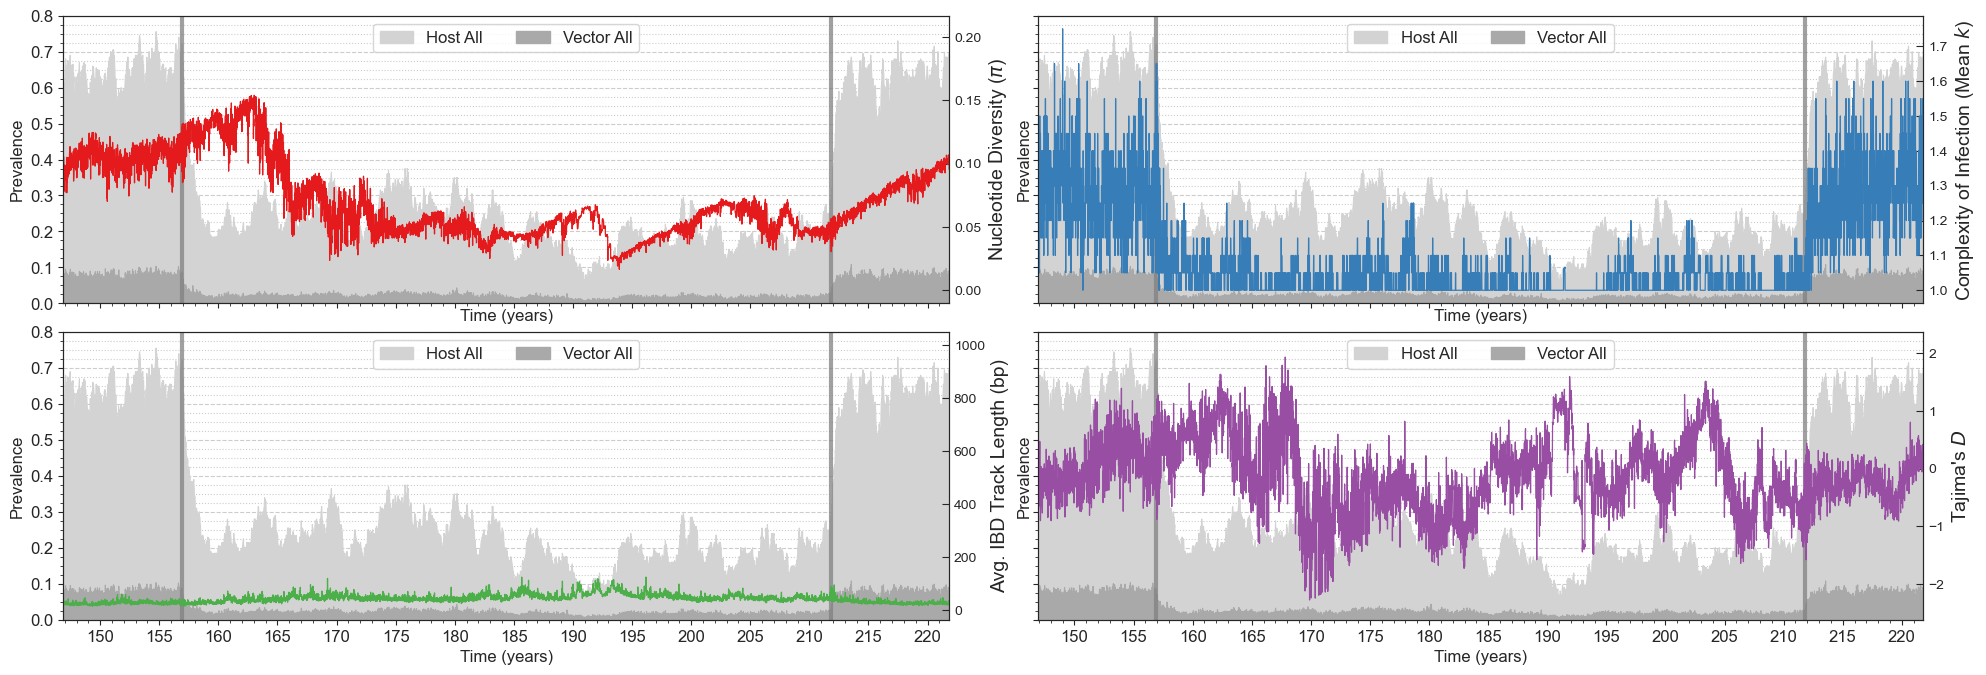

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(24, 8), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for ax, metric in zip(axes.flatten(), metrics):
    genetic_plot(op, og, metric, epoch_df, time_limits, m_dt, ax)

### Without functions, gives more control

In [36]:
plt.rcParams['font.size'] = 10

(0.0, 150.0)

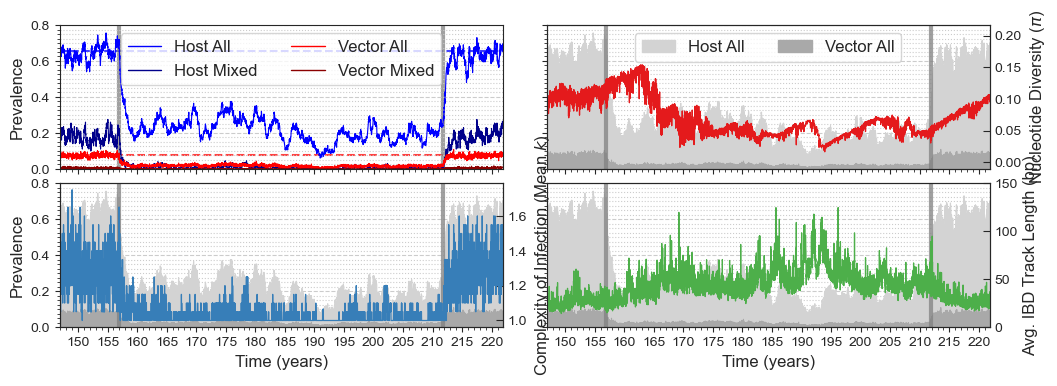

In [39]:
fig, axes = plt.subplots(2, 2, figsize=(12, 4), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.1, wspace=0.1)

ax = axes.flatten()

# Prevalence Plot
# --------------------------------------------------------------------------------
# Host Prevalence
ax[0].plot(op["t0"], op["HX"], color="blue", linewidth=0.8, label="Host All")
ax[0].plot(op["t0"], op["HmX"], color="darkblue", linewidth=0.8, label="Host Mixed")

# Vector Prevalence
ax[0].plot(op["t0"], op["VX"], color="red", linewidth=0.8, label="Vector All")
ax[0].plot(op["t0"], op["VmX"], color="darkred", linewidth=0.8, label="Vector Mixed")

# Delineate Equilibriums
ax[0].axhline(epoch_df.loc["init", "x_h"], 
           color="blue", linestyle='dashed', alpha=0.75,
           zorder=-1)
ax[0].axhline(epoch_df.loc["init", "x_v"], 
           color="red", linestyle='dashed', alpha=0.75,
           zorder=-1)

# Delineate Epochs
ax[0].axvline(epoch_df.loc["Crash", "t0"], 
           color="grey", alpha=0.75,
           linewidth=3,
           zorder=-1)
ax[0].axvline(epoch_df.loc["Recovery", "t0"], 
           color="grey", alpha=0.75,
           linewidth=3,
           zorder=-1)

# Limits
ax[0].set_ylim([0, 0.8])
if time_limits is not None:
    ax[0].set_xlim(time_limits)
else:
    epoch_t0 = epoch_df.iloc[0].t0
    epoch_t1 = epoch_df.iloc[-1].t1
    time_limits = [epoch_t0, epoch_t1]
    ax[0].set_xlim(time_limits)

# Ticks, y-axis
ax[0].yaxis.set_minor_locator(plt.MultipleLocator(0.025))
# ax[0].yaxis.set_minor_formatter(plt.FuncFormatter(lambda val, num: "%.03f" % val if num <= 3 else ""))
ax[0].tick_params('y', which='minor', labelsize=7)

# Ticks, x-axis
days_per_year = 365
years_per_major_tick = 5
ax[0].xaxis.set_major_locator(plt.MultipleLocator(days_per_year * years_per_major_tick))
ax[0].xaxis.set_minor_locator(plt.MultipleLocator(days_per_year))
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda v, i : int(v / days_per_year)))

# Labels
ax[0].set_ylabel("Prevalence", fontsize=12)

# Grid
ax[0].grid(axis="y", linestyle="dashed", zorder=-2)
ax[0].grid(axis="y", which="minor", linestyle="dotted", zorder=-2)

# Legend
leg = ax[0].legend(loc="upper center", ncol=2, fontsize=12)
for l in leg.legendHandles:
    l.set_linewidth(1.0)


# Nucleotide diversity
# --------------------------------------------------------------------------------
metric="pi"
# Host Prevalence
ax[1].fill_between(x=op["t0"], y1=0, y2=op["HX"], color="lightgrey", linewidth=0.8, label="Host All")

# Vector Prevalence
ax[1].fill_between(x=op["t0"], y1=0, y2=op["VX"], color="darkgrey", linewidth=0.8, label="Vector All")

# Delineate Epochs
ax[1].axvline(epoch_df.loc["Crash", "t0"], 
           color="grey", alpha=0.75,
           linewidth=3,
           zorder=2)
ax[1].axvline(epoch_df.loc["Recovery", "t0"], 
           color="grey", alpha=0.75,
           linewidth=3,
           zorder=2)

# Limits
ax[1].set_ylim([0, 0.8])
if time_limits is not None:
    ax[1].set_xlim(time_limits)
else:
    epoch_t0 = epoch_df.iloc[0].t0
    epoch_t1 = epoch_df.iloc[-1].t1
    time_limits = [epoch_t0, epoch_t1]
    ax[1].set_xlim(time_limits)

# Ticks, y-axis
ax[1].yaxis.set_minor_locator(plt.MultipleLocator(0.025))
ax[1].tick_params('y', which='minor', labelsize=7)

# Ticks, x-axis
days_per_year = 365
years_per_major_tick = 5
ax[1].xaxis.set_major_locator(plt.MultipleLocator(days_per_year * years_per_major_tick))
ax[1].xaxis.set_minor_locator(plt.MultipleLocator(days_per_year))
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda v, i : int(v / days_per_year)))

# Labels

# Grid
ax[1].grid(axis="y", linestyle="dashed", zorder=-2)
ax[1].grid(axis="y", which="minor", linestyle="dotted", zorder=-2)

# Legend
leg = ax[1].legend(loc="upper center", ncol=2, fontsize=12)
for l in leg.legendHandles:
    l.set_linewidth(1.0)

# Twin axis
axm = ax[1].twinx()

# Plot
axm.plot(og["t0"], og[metric], color=m_dt[metric], linewidth=0.9)
axm.set_ylabel(genetic_names[metric], fontsize=12)
axm.tick_params(axis='y', which='major', direction='in', length=5, labelsize=10)
axm.set_xlim(time_limits)


# Mean K
# --------------------------------------------------------------------------------
metric="mean_k"
# Host Prevalence
ax[2].fill_between(x=op["t0"], y1=0, y2=op["HX"], color="lightgrey", linewidth=0.8, label="Host All")

# Vector Prevalence
ax[2].fill_between(x=op["t0"], y1=0, y2=op["VX"], color="darkgrey", linewidth=0.8, label="Vector All")

# Delineate Epochs
ax[2].axvline(epoch_df.loc["Crash", "t0"], 
           color="grey", alpha=0.75,
           linewidth=3,
           zorder=2)
ax[2].axvline(epoch_df.loc["Recovery", "t0"], 
           color="grey", alpha=0.75,
           linewidth=3,
           zorder=2)

# Limits
ax[2].set_ylim([0, 0.8])
if time_limits is not None:
    ax[2].set_xlim(time_limits)
else:
    epoch_t0 = epoch_df.iloc[0].t0
    epoch_t1 = epoch_df.iloc[-1].t1
    time_limits = [epoch_t0, epoch_t1]
    ax[2].set_xlim(time_limits)

# Ticks, y-axis
ax[2].yaxis.set_minor_locator(plt.MultipleLocator(0.025))
ax[2].tick_params('y', which='minor', labelsize=7)

# Ticks, x-axis
days_per_year = 365
years_per_major_tick = 5
ax[2].xaxis.set_major_locator(plt.MultipleLocator(days_per_year * years_per_major_tick))
ax[2].xaxis.set_minor_locator(plt.MultipleLocator(days_per_year))
ax[2].xaxis.set_major_formatter(plt.FuncFormatter(lambda v, i : int(v / days_per_year)))

# Labels
ax[2].set_ylabel("Prevalence", fontsize=12)
ax[2].set_xlabel("Time (years)", fontsize=12)

# Grid
ax[2].grid(axis="y", linestyle="dashed", zorder=-2)
ax[2].grid(axis="y", which="minor", linestyle="dotted", zorder=-2)

# Twin axis
axm = ax[2].twinx()

# Plot
axm.plot(og["t0"], og[metric], color=m_dt[metric], linewidth=0.9)
axm.set_ylabel(genetic_names[metric], fontsize=12)
axm.tick_params(axis='y', which='major', direction='in', length=5, labelsize=10)
axm.set_xlim(time_limits)


# Average IBD tract length
# --------------------------------------------------------------------------------
metric="avg_l_ibd"
# Host Prevalence
ax[3].fill_between(x=op["t0"], y1=0, y2=op["HX"], color="lightgrey", linewidth=0.8, label="Host All")

# Vector Prevalence
ax[3].fill_between(x=op["t0"], y1=0, y2=op["VX"], color="darkgrey", linewidth=0.8, label="Vector All")

# Delineate Epochs
ax[3].axvline(epoch_df.loc["Crash", "t0"], 
           color="grey", alpha=0.75,
           linewidth=3,
           zorder=2)
ax[3].axvline(epoch_df.loc["Recovery", "t0"], 
           color="grey", alpha=0.75,
           linewidth=3,
           zorder=2)

# Limits
ax[3].set_ylim([0, 0.8])
if time_limits is not None:
    ax[3].set_xlim(time_limits)
else:
    epoch_t0 = epoch_df.iloc[0].t0
    epoch_t1 = epoch_df.iloc[-1].t1
    time_limits = [epoch_t0, epoch_t1]
    ax[3].set_xlim(time_limits)

# Ticks, y-axis
ax[3].yaxis.set_minor_locator(plt.MultipleLocator(0.025))
ax[3].tick_params('y', which='minor', labelsize=7)

# Ticks, x-axis
days_per_year = 365
years_per_major_tick = 5
ax[3].xaxis.set_major_locator(plt.MultipleLocator(days_per_year * years_per_major_tick))
ax[3].xaxis.set_minor_locator(plt.MultipleLocator(days_per_year))
ax[3].xaxis.set_major_formatter(plt.FuncFormatter(lambda v, i : int(v / days_per_year)))

# Labels
ax[3].set_xlabel("Time (years)", fontsize=12)

# Grid
ax[3].grid(axis="y", linestyle="dashed", zorder=-2)
ax[3].grid(axis="y", which="minor", linestyle="dotted", zorder=-2)

# Twin axis
axm = ax[3].twinx()

# Plot
axm.plot(og["t0"], og[metric], color=m_dt[metric], linewidth=0.9)
axm.set_ylabel(genetic_names[metric], fontsize=12)
axm.tick_params(axis='y', which='major', direction='in', length=5, labelsize=10)
axm.set_xlim(time_limits)
axm.set_ylim((0, 150))

In [46]:
plt.rcParams['font.size'] = 12

(0.0, 150.0)

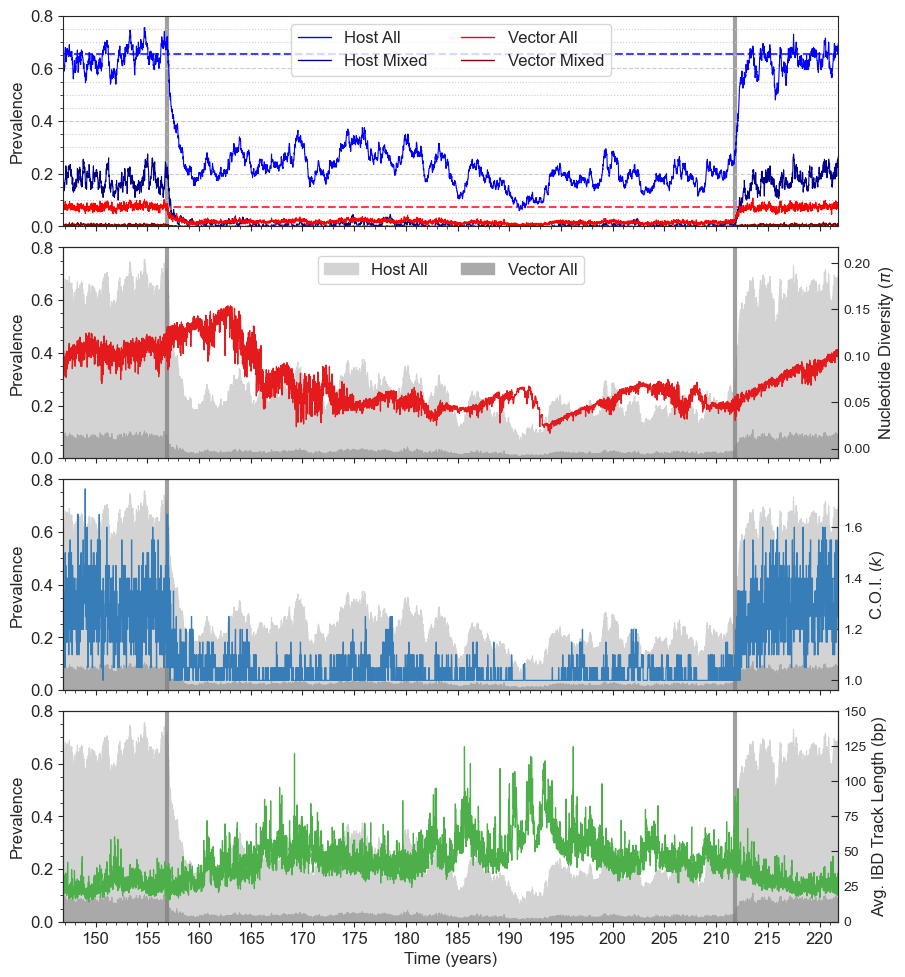

In [56]:
fig, axes = plt.subplots(4, 1, figsize=(10, 12), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.1, wspace=0.1)

ax = axes.flatten()

# Prevalence Plot
# --------------------------------------------------------------------------------
# Host Prevalence
ax[0].plot(op["t0"], op["HX"], color="blue", linewidth=0.8, label="Host All")
ax[0].plot(op["t0"], op["HmX"], color="darkblue", linewidth=0.8, label="Host Mixed")

# Vector Prevalence
ax[0].plot(op["t0"], op["VX"], color="red", linewidth=0.8, label="Vector All")
ax[0].plot(op["t0"], op["VmX"], color="darkred", linewidth=0.8, label="Vector Mixed")

# Delineate Equilibriums
ax[0].axhline(epoch_df.loc["init", "x_h"], 
           color="blue", linestyle='dashed', alpha=0.75,
           zorder=-1)
ax[0].axhline(epoch_df.loc["init", "x_v"], 
           color="red", linestyle='dashed', alpha=0.75,
           zorder=-1)

# Delineate Epochs
ax[0].axvline(epoch_df.loc["Crash", "t0"], 
           color="grey", alpha=0.75,
           linewidth=3,
           zorder=-1)
ax[0].axvline(epoch_df.loc["Recovery", "t0"], 
           color="grey", alpha=0.75,
           linewidth=3,
           zorder=-1)

# Limits
ax[0].set_ylim([0, 0.8])
if time_limits is not None:
    ax[0].set_xlim(time_limits)
else:
    epoch_t0 = epoch_df.iloc[0].t0
    epoch_t1 = epoch_df.iloc[-1].t1
    time_limits = [epoch_t0, epoch_t1]
    ax[0].set_xlim(time_limits)

# Ticks, y-axis
ax[0].yaxis.set_minor_locator(plt.MultipleLocator(0.05))
# ax[0].yaxis.set_minor_formatter(plt.FuncFormatter(lambda val, num: "%.03f" % val if num <= 3 else ""))
ax[0].tick_params('y', which='minor', labelsize=7)

# Ticks, x-axis
days_per_year = 365
years_per_major_tick = 5
ax[0].xaxis.set_major_locator(plt.MultipleLocator(days_per_year * years_per_major_tick))
ax[0].xaxis.set_minor_locator(plt.MultipleLocator(days_per_year))
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda v, i : int(v / days_per_year)))

# Labels
ax[0].set_ylabel("Prevalence", fontsize=12)

# Grid
ax[0].grid(axis="y", linestyle="dashed", zorder=-2)
ax[0].grid(axis="y", which="minor", linestyle="dotted", zorder=-2)

# Legend
leg = ax[0].legend(loc="upper center", ncol=2, fontsize=12)
for l in leg.legendHandles:
    l.set_linewidth(1.0)


# Nucleotide diversity
# --------------------------------------------------------------------------------
metric="pi"
# Host Prevalence
ax[1].fill_between(x=op["t0"], y1=0, y2=op["HX"], color="lightgrey", linewidth=0.8, label="Host All")

# Vector Prevalence
ax[1].fill_between(x=op["t0"], y1=0, y2=op["VX"], color="darkgrey", linewidth=0.8, label="Vector All")

# Delineate Epochs
ax[1].axvline(epoch_df.loc["Crash", "t0"], 
           color="grey", alpha=0.75,
           linewidth=3,
           zorder=2)
ax[1].axvline(epoch_df.loc["Recovery", "t0"], 
           color="grey", alpha=0.75,
           linewidth=3,
           zorder=2)

# Limits
ax[1].set_ylim([0, 0.8])
if time_limits is not None:
    ax[1].set_xlim(time_limits)
else:
    epoch_t0 = epoch_df.iloc[0].t0
    epoch_t1 = epoch_df.iloc[-1].t1
    time_limits = [epoch_t0, epoch_t1]
    ax[1].set_xlim(time_limits)

# Ticks, y-axis
ax[1].yaxis.set_minor_locator(plt.MultipleLocator(0.05))
ax[1].tick_params('y', which='minor', labelsize=7)

# Ticks, x-axis
days_per_year = 365
years_per_major_tick = 5
ax[1].xaxis.set_major_locator(plt.MultipleLocator(days_per_year * years_per_major_tick))
ax[1].xaxis.set_minor_locator(plt.MultipleLocator(days_per_year))
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda v, i : int(v / days_per_year)))

# Labels
ax[1].set_ylabel("Prevalence", fontsize=12)

# Grid
# ax[1].grid(axis="y", linestyle="dashed", zorder=-2)
# ax[1].grid(axis="y", which="minor", linestyle="dotted", zorder=-2)

# Legend
leg = ax[1].legend(loc="upper center", ncol=2, fontsize=12)
for l in leg.legendHandles:
    l.set_linewidth(1.0)

# Twin axis
axm = ax[1].twinx()

# Plot
axm.plot(og["t0"], og[metric], color=m_dt[metric], linewidth=0.9)
axm.set_ylabel(genetic_names[metric], fontsize=12)
axm.tick_params(axis='y', which='major', direction='in', length=5, labelsize=10)
axm.set_xlim(time_limits)
#axm.grid(axis="y", linestyle="dotted", zorder=-2, color="grey")


# Mean K
# --------------------------------------------------------------------------------
metric="mean_k"
# Host Prevalence
ax[2].fill_between(x=op["t0"], y1=0, y2=op["HX"], color="lightgrey", linewidth=0.8, label="Host All")

# Vector Prevalence
ax[2].fill_between(x=op["t0"], y1=0, y2=op["VX"], color="darkgrey", linewidth=0.8, label="Vector All")

# Delineate Epochs
ax[2].axvline(epoch_df.loc["Crash", "t0"], 
           color="grey", alpha=0.75,
           linewidth=3,
           zorder=2)
ax[2].axvline(epoch_df.loc["Recovery", "t0"], 
           color="grey", alpha=0.75,
           linewidth=3,
           zorder=2)

# Limits
ax[2].set_ylim([0, 0.8])
if time_limits is not None:
    ax[2].set_xlim(time_limits)
else:
    epoch_t0 = epoch_df.iloc[0].t0
    epoch_t1 = epoch_df.iloc[-1].t1
    time_limits = [epoch_t0, epoch_t1]
    ax[2].set_xlim(time_limits)

# Ticks, y-axis
ax[2].yaxis.set_minor_locator(plt.MultipleLocator(0.05))
ax[2].tick_params('y', which='minor', labelsize=7)

# Ticks, x-axis
days_per_year = 365
years_per_major_tick = 5
ax[2].xaxis.set_major_locator(plt.MultipleLocator(days_per_year * years_per_major_tick))
ax[2].xaxis.set_minor_locator(plt.MultipleLocator(days_per_year))
ax[2].xaxis.set_major_formatter(plt.FuncFormatter(lambda v, i : int(v / days_per_year)))

# Labels
ax[2].set_ylabel("Prevalence", fontsize=12)
#ax[2].set_xlabel("Time (years)", fontsize=12)

# Grid
# ax[2].grid(axis="y", linestyle="dashed", zorder=-2)
# ax[2].grid(axis="y", which="minor", linestyle="dotted", zorder=-2)

# Twin axis
axm = ax[2].twinx()

# Plot
axm.plot(og["t0"], og[metric], color=m_dt[metric], linewidth=0.9)
axm.set_ylabel(genetic_names[metric], fontsize=12)
axm.tick_params(axis='y', which='major', direction='in', length=5, labelsize=10)
axm.set_xlim(time_limits)
#axm.grid(axis="y", linestyle="dotted", zorder=-2, color="grey")


# Average IBD tract length
# --------------------------------------------------------------------------------
metric="avg_l_ibd"
# Host Prevalence
ax[3].fill_between(x=op["t0"], y1=0, y2=op["HX"], color="lightgrey", linewidth=0.8, label="Host All")

# Vector Prevalence
ax[3].fill_between(x=op["t0"], y1=0, y2=op["VX"], color="darkgrey", linewidth=0.8, label="Vector All")

# Delineate Epochs
ax[3].axvline(epoch_df.loc["Crash", "t0"], 
           color="grey", alpha=0.75,
           linewidth=3,
           zorder=2)
ax[3].axvline(epoch_df.loc["Recovery", "t0"], 
           color="grey", alpha=0.75,
           linewidth=3,
           zorder=2)

# Limits
ax[3].set_ylim([0, 0.8])
if time_limits is not None:
    ax[3].set_xlim(time_limits)
else:
    epoch_t0 = epoch_df.iloc[0].t0
    epoch_t1 = epoch_df.iloc[-1].t1
    time_limits = [epoch_t0, epoch_t1]
    ax[3].set_xlim(time_limits)

# Ticks, y-axis
ax[3].yaxis.set_minor_locator(plt.MultipleLocator(0.05))
ax[3].tick_params('y', which='minor', labelsize=7)

# Ticks, x-axis
days_per_year = 365
years_per_major_tick = 5
ax[3].xaxis.set_major_locator(plt.MultipleLocator(days_per_year * years_per_major_tick))
ax[3].xaxis.set_minor_locator(plt.MultipleLocator(days_per_year))
ax[3].xaxis.set_major_formatter(plt.FuncFormatter(lambda v, i : int(v / days_per_year)))

# Labels
ax[3].set_ylabel("Prevalence", fontsize=12)
ax[3].set_xlabel("Time (years)", fontsize=12)

# Grid
# ax[3].grid(axis="y", linestyle="dashed", zorder=-2)
# ax[3].grid(axis="y", which="minor", linestyle="dotted", zorder=-2)

# Twin axis
axm = ax[3].twinx()

# Plot
axm.plot(og["t0"], og[metric], color=m_dt[metric], linewidth=0.9)
axm.set_ylabel(genetic_names[metric], fontsize=12)
axm.tick_params(axis='y', which='major', direction='in', length=5, labelsize=10)
axm.set_xlim(time_limits)
axm.set_ylim((0, 150))
#axm.grid(axis="y", linestyle="dotted", zorder=-4, color="grey")